In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
ROOTPATH = 'E:/AThesis/Final'
DATAPATH= ROOTPATH+'/training_set'
TRAINPATH = ROOTPATH+'/training_set'
TESTPATH =  ROOTPATH+'/testing_set'
MODELPATH = ROOTPATH+'/model'

In [4]:
two=glob.glob(DATAPATH+'/1.two/*.*')
five=glob.glob(DATAPATH+'/2.five/*.*')
ten=glob.glob(DATAPATH+'/3.ten/*.*')
twenty=glob.glob(DATAPATH+'/4.twenty/*.*')
fifty=glob.glob(DATAPATH+'/5.fifty/*.*')
one_hundred=glob.glob(DATAPATH+'/6.one_hundred/*.*')
two_hundred=glob.glob(DATAPATH+'/7.two_hundred/*.*')
five_hundred=glob.glob(DATAPATH+'/8.five_hundred/*.*')
one_thousand=glob.glob(DATAPATH+'/9.one_thousand/*.*')

In [5]:
print('two: ',len(two))
print('five : ',len(five))
print('ten: ',len(ten))
print('twenty: ',len(twenty))
print('fifty: ',len(fifty))
print('one_hundred: ',len(one_hundred))
print('two_hundred: ',len(two_hundred))
print('five_hundred: ',len(five_hundred))
print('one_thousand: ',len(one_thousand))

two:  600
five :  600
ten:  600
twenty:  600
fifty:  600
one_hundred:  600
two_hundred:  600
five_hundred:  600
one_thousand:  600


In [6]:
dataset_classes=[two,five,ten,twenty,fifty,one_hundred,two_hundred,five_hundred,one_thousand]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  9


In [7]:
IMAGE_SIZE=224
BATCH_SIZE=64

#pre_processing_training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2)

training_set = train_datagen.flow_from_directory(
        DATAPATH,
        shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training')


validation_set = train_datagen.flow_from_directory(
        DATAPATH,
         shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation')

Found 4320 images belonging to 9 classes.
Found 1080 images belonging to 9 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        TESTPATH,
         shuffle=False,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 575 images belonging to 9 classes.


In [9]:
training_set.class_indices

{'1.two': 0,
 '2.five': 1,
 '3.ten': 2,
 '4.twenty': 3,
 '5.fifty': 4,
 '6.one_hundred': 5,
 '7.two_hundred': 6,
 '8.five_hundred': 7,
 '9.one_thousand': 8}

In [10]:
validation_set.class_indices

{'1.two': 0,
 '2.five': 1,
 '3.ten': 2,
 '4.twenty': 3,
 '5.fifty': 4,
 '6.one_hundred': 5,
 '7.two_hundred': 6,
 '8.five_hundred': 7,
 '9.one_thousand': 8}

In [11]:
test_set.class_indices

{'1.two': 0,
 '2.five': 1,
 '3.ten': 2,
 '4.twenty': 3,
 '5.fifty': 4,
 '6.one_hundred': 5,
 '7.two_hundred': 6,
 '8.five_hundred': 7,
 '9.one_thousand': 8}

In [12]:
total_class=len(training_set.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  9


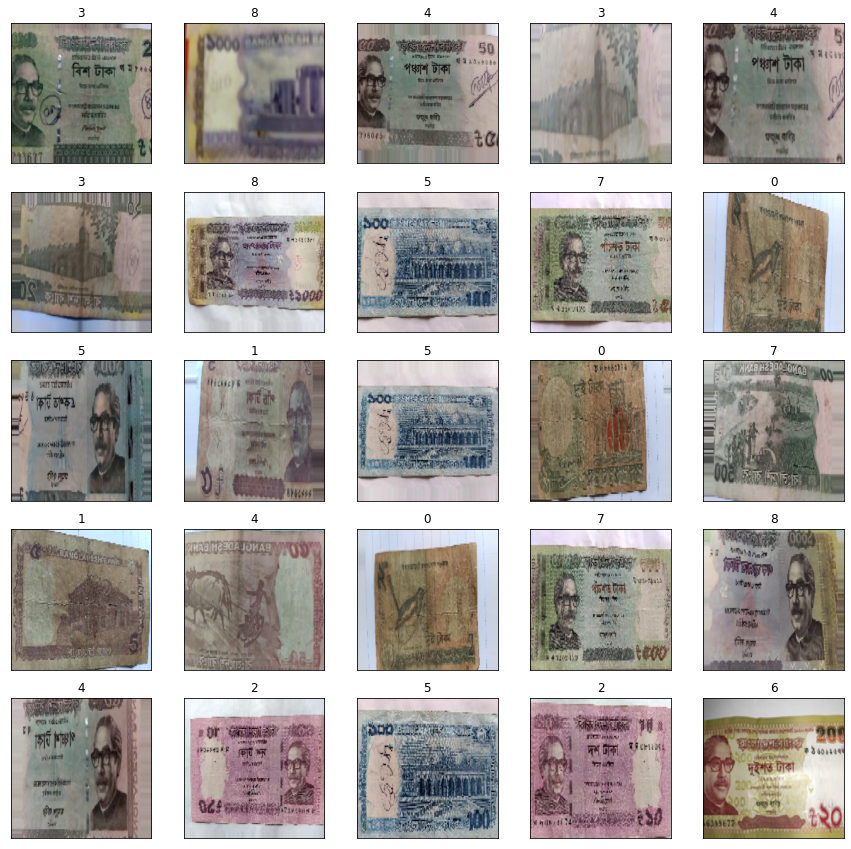

In [13]:
x,y=training_set.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

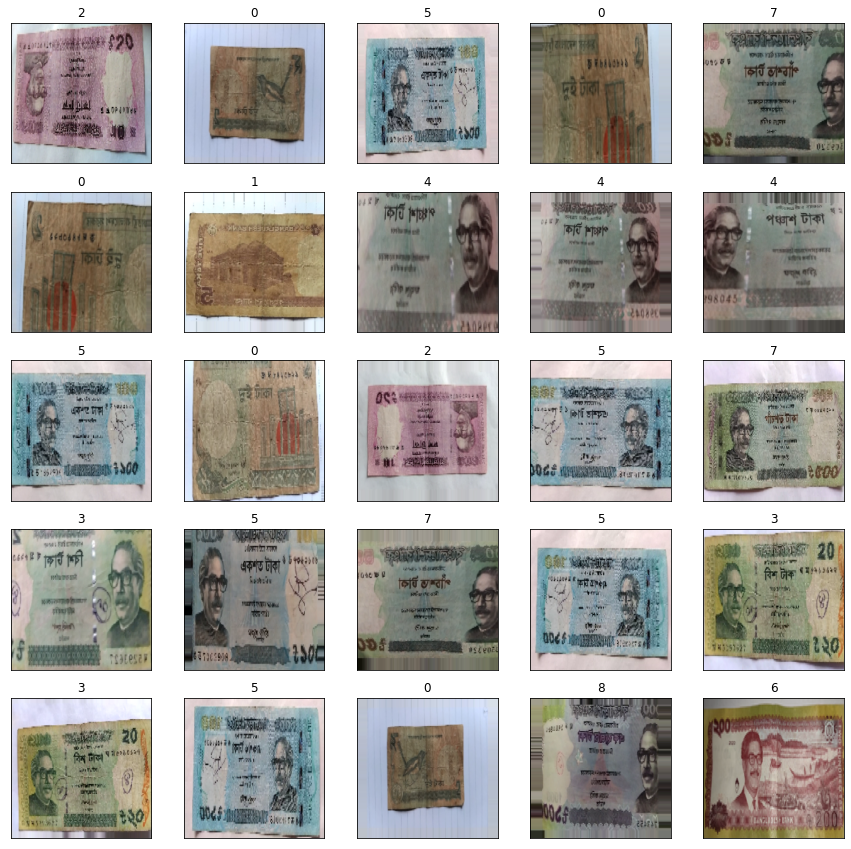

In [14]:
x,y=validation_set.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [15]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, Dense, Flatten 

In [16]:
mobileV2_model=tf.keras.applications.mobilenet.MobileNet()

In [17]:
mobileV2_model = Sequential()
pretrained_model=tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224,224,3), 
    include_top=False, weights='imagenet', input_tensor=None, pooling='avg',
    classes=9
)
for layer in pretrained_model.layers:
        layer.trainable=False

mobileV2_model.add(pretrained_model)

9412608/9406464 [==============================] - 6s 1us/step


In [18]:
mobileV2_model.add(Flatten())
mobileV2_model.add(Dense(512, activation='relu'))
mobileV2_model.add(Dense(9, activation='softmax'))

In [19]:
mobileV2_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 4617      
Total params: 2,918,473
Trainable params: 660,489
Non-trainable params: 2,257,984
_________________________________________________________________


In [20]:
mobileV2_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=MODELPATH+'MobileNetV2_Pretrained.model.best.hdf5', verbose=1 ,save_best_only=True)

In [22]:
history=mobileV2_model.fit(training_set,
                epochs=50,
                validation_data=validation_set,
                callbacks=[checkpointer])

Epoch 1/50
68/68 [==============================] - ETA: 0s - loss: 0.3192 - accuracy: 0.9104
Epoch 00001: val_loss improved from inf to 0.25785, saving model to E:/AThesis/Final\modelMobileNetV2_Pretrained.model.best.hdf5
68/68 [==============================] - 226s 3s/step - loss: 0.3192 - accuracy: 0.9104 - val_loss: 0.2579 - val_accuracy: 0.9130
Epoch 2/50
68/68 [==============================] - ETA: 0s - loss: 0.0136 - accuracy: 0.9995
Epoch 00002: val_loss improved from 0.25785 to 0.18408, saving model to E:/AThesis/Final\modelMobileNetV2_Pretrained.model.best.hdf5
68/68 [==============================] - 156s 2s/step - loss: 0.0136 - accuracy: 0.9995 - val_loss: 0.1841 - val_accuracy: 0.9370
Epoch 3/50
68/68 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 0.9995
Epoch 00003: val_loss did not improve from 0.18408
68/68 [==============================] - 153s 2s/step - loss: 0.0086 - accuracy: 0.9995 - val_loss: 0.1950 - val_accuracy: 0.9361
Epoch 4/50
68/6

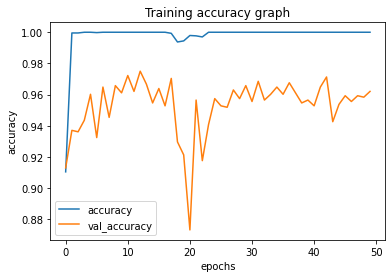

In [23]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

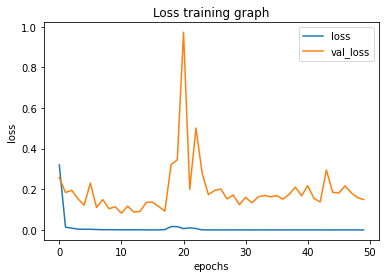

In [24]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [25]:
test_loss,test_accuracy=mobileV2_model.evaluate(test_set)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

9/9 [==============================] - 11s 1s/step - loss: 1.2258 - accuracy: 0.8852
Test Loss:  1.2258409261703491
Test Accuracy:  0.8852173686027527


In [26]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  88.52173686027527


In [27]:
from tensorflow.keras.preprocessing import image

(1, 224, 224, 3)
[[9.1787352e-13 1.0000000e+00 6.3720247e-15 1.8020968e-08 1.0080974e-14
  1.7368544e-20 2.1993077e-16 2.3111336e-11 2.1775703e-15]]
1


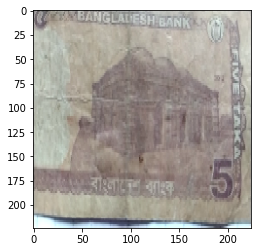

In [29]:
random_image=image.load_img('E:/AThesis/Final/testing_set/2.five/five14.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=mobileV2_model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[6.6351413e-09 1.1161198e-08 9.9999523e-01 1.9910010e-08 3.0341815e-07
  1.3778823e-08 5.0110785e-08 4.0840846e-06 3.1447129e-07]]
2


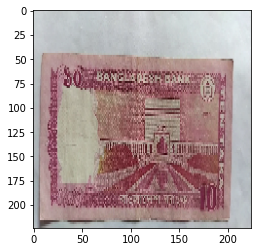

In [30]:
random_image=image.load_img('E:/AThesis/Final/testing_set/3.ten/ten46.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=mobileV2_model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[1.0275236e-07 6.8160728e-07 2.8664253e-09 3.0840366e-07 9.9999833e-01
  2.0388121e-13 3.3380174e-09 5.3804303e-07 1.4912081e-10]]
4


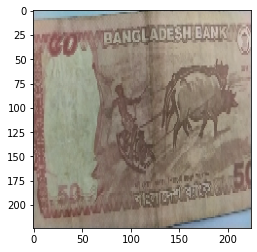

In [31]:
random_image=image.load_img('E:/AThesis/Final/testing_set/5.fifty/fifty34.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=mobileV2_model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[3.2782766e-13 9.5930945e-15 1.2741497e-15 1.0000000e+00 5.3653046e-14
  6.0012423e-13 3.5587050e-17 1.1570036e-12 3.3669467e-19]]
3


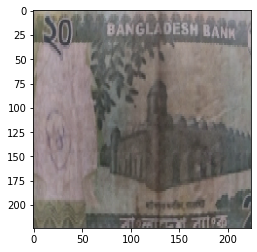

In [32]:
random_image=image.load_img('E:/AThesis/Final/testing_set/4.twenty/twenty38.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=mobileV2_model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[2.9342568e-15 6.8062354e-11 5.9958532e-13 1.0000000e+00 5.2959143e-10
  2.9566263e-12 1.7935189e-10 3.4194965e-09 9.9018294e-10]]
3


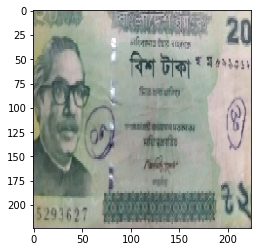

In [33]:
random_image=image.load_img('E:/AThesis/Final/testing_set/4.twenty/twenty5.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=mobileV2_model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[2.8027907e-01 1.1093628e-02 4.8791127e-09 1.6441791e-04 7.0779639e-01
  4.5522933e-13 4.9740192e-06 6.3382107e-04 2.7709377e-05]]
4


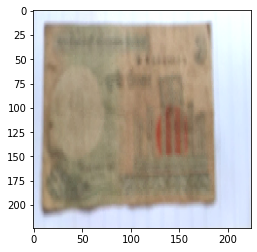

In [34]:
random_image=image.load_img('E:/AThesis/Final/testing_set/1.two/two44.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=mobileV2_model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

In [35]:
predicted_result=mobileV2_model.predict(test_set)
predicted_result[:5]

array([[9.99998808e-01, 1.21138737e-06, 3.30490670e-12, 3.20334159e-08,
        2.20636204e-10, 3.32485393e-16, 1.16731841e-12, 4.57041099e-10,
        1.81839890e-15],
       [9.99999881e-01, 1.76272408e-07, 2.75763326e-13, 1.27414135e-09,
        2.33382813e-10, 1.08539384e-16, 1.71334214e-12, 1.17342400e-10,
        9.81054735e-16],
       [9.99999642e-01, 3.20260682e-07, 1.61170366e-13, 1.04728248e-09,
        1.90600757e-09, 9.48964164e-17, 2.06352578e-12, 1.64098207e-10,
        1.03563500e-15],
       [9.99999762e-01, 2.97969450e-07, 2.84175840e-13, 1.31370437e-09,
        1.89578708e-09, 3.01987733e-16, 1.50765034e-12, 6.25964558e-11,
        1.41263782e-15],
       [9.99993205e-01, 1.20836030e-09, 3.67007915e-16, 6.38987444e-07,
        5.94076027e-06, 2.75173754e-19, 2.92452654e-07, 2.39681955e-11,
        9.88492482e-11]], dtype=float32)

In [36]:
predicted_class=np.argmax(predicted_result,axis=-1)
predicted_class[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [37]:
test_classes=test_set.classes
test_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_classes,predicted_class)
print(cm)

[[69  0  0  0  3  0  0  0  0]
 [ 0 60  0  0  0  0  0  0  0]
 [ 0  0 60  0  0  0  0  0  0]
 [ 0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0]
 [ 0  0  0  0  0 38  0  0 34]
 [ 0  0  0  0  0  0 47  0  0]
 [ 0  0  0  0 29  0  0 43  0]
 [ 0  0  0  0  0  0  0  0 72]]


<AxesSubplot:>

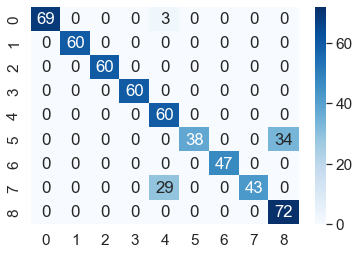

In [39]:
import seaborn as sns
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,fmt='d',cmap="Blues")

In [40]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_classes,predicted_class))

Accuracy score:  0.8852173913043478


In [41]:
from sklearn.metrics import classification_report
print('Classification Report \n',classification_report(test_classes,predicted_class))

Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        72
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       0.65      1.00      0.79        60
           5       1.00      0.53      0.69        72
           6       1.00      1.00      1.00        47
           7       1.00      0.60      0.75        72
           8       0.68      1.00      0.81        72

    accuracy                           0.89       575
   macro avg       0.93      0.90      0.89       575
weighted avg       0.92      0.89      0.88       575



In [42]:
import time
t = time.time()

export_path_keras = "Final Thesis/Saved Model/Model_7_mobileNetv2_Pretrained{}_model_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
mobileV2_model.save(export_path_keras)

Final Thesis/Saved Model/Model_7_mobileNetv2_Pretrained0.8852173686027527_model_1647615185.h5


In [43]:
from tensorflow.keras.models import load_model

In [44]:
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 4617      
Total params: 2,918,473
Trainable params: 660,489
Non-trainable params: 2,257,984
_________________________________________________________________


In [45]:
print(len(reload_model.weights))
print(reload_model.output_shape)

264
(None, 9)


In [46]:
reload_model.layers

In [47]:
t = time.time()

export_path_sm = "Final Thesis/Saved Model/Model_7_mobileNetV2_Pretrained {} Model {}".format(test_accuracy,int(t))
print(export_path_sm)

tf.saved_model.save(mobileV2_model, export_path_sm)

Final Thesis/Saved Model/Model_7_mobileNetV2_Pretrained 0.8852173686027527 Model 1647615221
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Final Thesis/Saved Model/Model_7_mobileNetV2_Pretrained 0.8852173686027527 Model 1647615221\assets


In [48]:
reload_tf_saved_model=tf.saved_model.load(export_path_sm)

In [49]:
reload_tf_saved_model.signatures['serving_default']

<ConcreteFunction signature_wrapper(mobilenetv2_1.00_224_input) at 0x217AC862908>

In [50]:
reload_tf_saved_model

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x21793a96b38>

In [51]:
model=reload_model

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import pyttsx3 
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:
export_path_keras = "Final Thesis/Saved Model/7.Model_mobileNetv2_Pretrained.h5"

In [4]:
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 4617      
Total params: 2,918,473
Trainable params: 660,489
Non-trainable params: 2,257,984
_________________________________________________________________


In [5]:
def noteclass(cls):
    txt=pyttsx3.init()
    if cls==0:
        ans="Two Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==1:
        ans="Five Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==2:
        ans="Ten Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==3:
        ans="Twenty Taka"
        print(ans)
        txt.say(ans)
       # txt.runAndWait()
    elif cls==4:
        ans="Fifty Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==5:
        ans="One Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==6:
        ans="Two Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==7:
        ans="Five Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    else:
        ans="One Thousand Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    

Fifty Taka


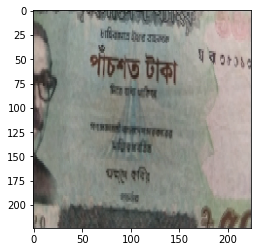

In [6]:
#""WIN_20220326_11_18_21_Pro"""
random_image=image.load_img('E:/AThesis/Final/testing_set/8.five_hundred/five_hundred31.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))